## Projeto de Segmentação de Clientes

Neste projeto, realizarei uma segmentação não supervisionada dos dados nos registros dos clientes de um banco de dados de uma empresa de varejo. A segmentação de clientes é a prática de separar os clientes em grupos que refletem similaridades entre os clientes em cada cluster. 

Vou dividir os clientes em segmentos para otimizar a importância de cada cliente para o negócio. Isso é feito para modificar produtos de acordo com as necessidades distintas e comportamentos dos clientes, o que também ajuda o negócio a atender às preocupações de diferentes tipos de clientes.


# #01 - Obtendo os dados

In [228]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [229]:
df = pd.read_excel('Base de Vendas Varejo.xlsx')

In [230]:
df.head(3).style.background_gradient()

,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,Custo de Envio,Nome do Cliente,Cidade,CEP,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio
0,674,4706,2012-12-28 00:00:00,Não Especificada,30,2116.700000,0.020000,Aéreo Normal,488.818000,67.280000,19.990000,Bradley Drucker,Recife,90069,Pernambuco,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Capas e Acessórios,Catalog Binders with Expanding Posts,Small Box,0.400000,2012-12-30 00:00:00
1,816,5891,2012-12-28 00:00:00,Média,2,44.450000,0.010000,Aéreo Normal,-17.457000,20.980000,1.490000,Art Foster,João Pessoa,80126,Paraíba,Nordeste,Brasil,Escritório em Casa,Material de Escritório,Capas e Acessórios,Avery Legal 4-Ring Binder,Small Box,0.350000,2012-12-30 00:00:00
2,1876,13507,2012-12-29 00:00:00,Média,27,176.100000,0.090000,Aéreo Normal,-75.710000,6.780000,6.180000,Anna Andreadi,Belém,60110,Pará,Norte,Brasil,Pequenas Empresas,Material de Escritório,Papel,Strathmore Photo Mount Cards,Small Box,0.390000,2012-12-30 00:00:00


In [231]:
df.tail(3).style.background_gradient()


,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,Custo de Envio,Nome do Cliente,Cidade,CEP,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio
8396,4031,28774,2009-01-01 00:00:00,Alta,32,180.360000,0.100000,Aéreo Normal,-111.800000,5.980000,4.690000,Jessica Myrick,São Paulo,15131,São Paulo,Sudeste,Brasil,Pequenas Empresas,Material de Escritório,Armazenamento e Organização,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 12 1/4""D x 10 1/2""H",Small Box,0.680000,2009-01-02 00:00:00
8397,5272,37537,2009-01-02 00:00:00,Baixa,4,1239.060000,0.000000,Transporte Rodoviário,-193.080000,291.730000,48.800000,Alan Schoenberger,Recife,94559,Pernambuco,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Hon 4070 Series Pagoda™ Armless Upholstered Stacking Chairs,Jumbo Drum,0.560000,2009-01-02 00:00:00
8398,6225,44069,2009-01-02 00:00:00,Crítica,43,614.800000,0.080000,Aéreo Normal,247.790000,15.040000,1.970000,Elizabeth Moffitt,Recife,90640,Pernambuco,Nordeste,Brasil,Consumidor,Material de Escritório,Papel,White GlueTop Scratch Pads,Wrap Bag,0.390000,2009-01-02 00:00:00


In [232]:
df.shape

(8399, 24)

In [233]:
df.columns

Index(['Row ID', 'Order ID', 'Data da Venda', 'Prioridade', 'Quantidade',
       'Valor da Venda', 'Desconto', 'Forma de Envio', 'Lucro',
       'Preço Unitário', 'Custo de Envio', 'Nome do Cliente', 'Cidade', 'CEP',
       'Estado', 'Região', 'País', 'Segmento do Cliente',
       'Categoria do Produto', 'Sub-Categoria do Produto', 'Nome do Produto',
       'Embalagem', 'Margem', 'Data de Envio'],
      dtype='object')

# #02 - Limpeza dos dados

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Row ID                    8399 non-null   int64         
 1   Order ID                  8399 non-null   int64         
 2   Data da Venda             8399 non-null   datetime64[ns]
 3   Prioridade                8399 non-null   object        
 4   Quantidade                8399 non-null   int64         
 5   Valor da Venda            8399 non-null   float64       
 6   Desconto                  8399 non-null   float64       
 7   Forma de Envio            8399 non-null   object        
 8   Lucro                     8399 non-null   float64       
 9   Preço Unitário            8399 non-null   float64       
 10  Custo de Envio            8399 non-null   float64       
 11  Nome do Cliente           8399 non-null   object        
 12  Cidade              

In [235]:
df.describe()

,Row ID,Order ID,Quantidade,Valor da Venda,Desconto,Lucro,Preço Unitário,Custo de Envio,CEP,Margem
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184422,89.346259,12.838557,52789.993333,0.512513
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653326,290.354383,17.264052,28492.028030,0.135589
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000,1001.000000,0.350000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,30337.000000,0.380000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,52732.000000,0.520000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.748000,85.990000,13.990000,77577.000000,0.590000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,99362.000000,0.850000


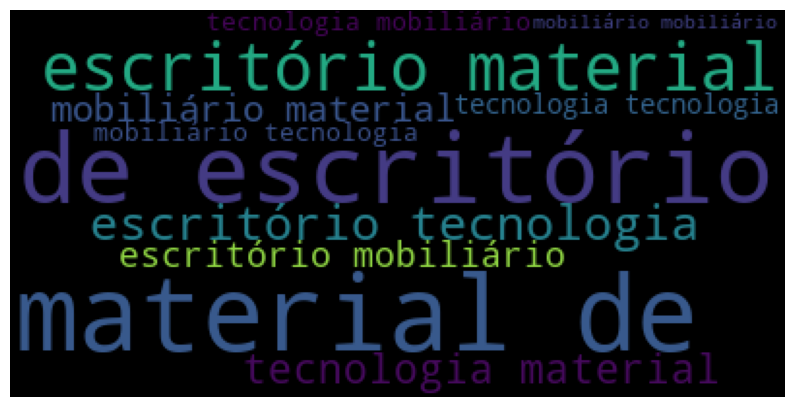

In [236]:
#Nuvem de palavras
word_string = " ".join(df['Categoria do Produto'].str.lower())
word_count = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(10,10))
plt.clf()
plt.imshow(word_count)
plt.axis('off')
plt.show()

In [237]:
print("Total de vendas por Estado: \n", df['Estado'].value_counts())

Total de vendas por Estado: 
 Goiás                  1638
São Paulo              1164
Pernambuco              801
Rio Grande do Sul       758
Paraná                  727
Mato Grosso do Sul      456
Espírito Santo          360
Santa Catarina          353
Mato Grosso             317
Bahia                   289
Minas Gerais            247
Paraíba                 177
Piauí                   148
Rio Grande do Norte     146
Alagoas                 134
Rio de Janeiro          124
Sergipe                 114
Tocantins               106
Maranhão                 84
Distrito Federal         82
Pará                     66
Amazonas                 65
Ceará                    43
Name: Estado, dtype: int64


C:\Users\Jackson\AppData\Local\Temp\ipykernel_36676\3854980767.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

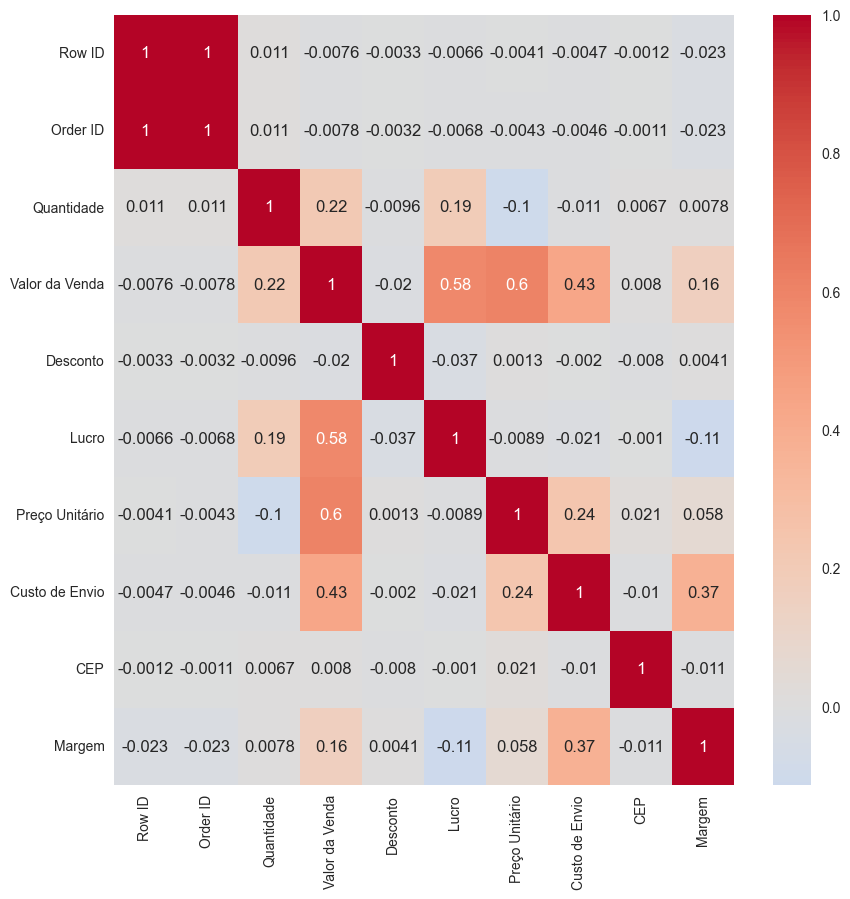

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
plt.figure(figsize=(10, 10))  
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)

In [239]:
# Supondo que 'df' seja o seu DataFrame e 'nome_do_cliente' seja o nome da coluna com os nomes dos clientes

# Primeiro, use factorize() para obter IDs numéricos únicos para os nomes dos clientes
df['cliente_id'], _ = pd.factorize(df['Nome do Cliente'])

# Em seguida, normalize os IDs para o intervalo desejado (0 a 10000)
min_id = df['cliente_id'].min()
max_id = df['cliente_id'].max()
df['cliente_id'] = ((df['cliente_id'] - min_id) / (max_id - min_id)) * 10000

# Converta os IDs para inteiros
df['cliente_id'] = df['cliente_id'].astype(int)

In [240]:
# Reorganize as colunas para colocar 'cliente_id' na primeira posição
cols = list(df.columns)
cols = ['cliente_id'] + [col for col in cols if col != 'cliente_id']
df = df[cols]

In [241]:
#Excluindo coluna Nome do Clien (LGPD)
df = df.drop(columns=['Nome do Cliente'])

In [242]:
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"])
dates = []
for i in df["Data da Venda"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("A venda mais recente aconteceu em:",max(dates))
print("A venda mais antiga aconteceu em::",min(dates))

A venda mais recente aconteceu em: 2012-12-30
A venda mais antiga aconteceu em:: 2009-01-01


In [243]:
df = df.drop(columns=['Data da Venda'])
df = df.drop(columns=['Data de Envio'])


# #03 - Pré-processamento dos dados para realizar operações de agrupamento

In [244]:
# Pegando as variaveis categoricas

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print('Variaveis categoricas desse dataset:', object_cols)

Variaveis categoricas desse dataset: ['Prioridade', 'Forma de Envio', 'Cidade', 'Estado', 'Região', 'País', 'Segmento do Cliente', 'Categoria do Produto', 'Sub-Categoria do Produto', 'Nome do Produto', 'Embalagem']


In [245]:
# Transformando todas as variaveis categoricas em Númericas
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("Todas as features são númericas agora")

Todas as features são númericas agora


In [246]:
df.head()

,cliente_id,Row ID,Order ID,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,...,CEP,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem
0,0,674,4706,4,30,2116.70,0.02,0,488.818,67.28,...,90069,14,1,0,3,0,3,333,4,0.40
1,12,816,5891,3,2,44.45,0.01,0,-17.457,20.98,...,80126,12,1,0,2,0,3,219,4,0.35
2,25,1876,13507,3,27,176.10,0.09,0,-75.710,6.78,...,60110,13,2,0,3,0,13,1015,4,0.39
3,37,3583,25542,1,37,257.46,0.09,1,-18.660,7.28,...,76543,6,0,0,2,0,13,276,6,0.39
4,50,4008,28611,1,30,15337.58,0.10,0,6670.409,525.98,...,14150,21,3,0,0,0,3,516,4,0.37


In [247]:
df.dtypes

cliente_id                    int32
Row ID                        int64
Order ID                      int64
Prioridade                    int32
Quantidade                    int64
Valor da Venda              float64
Desconto                    float64
Forma de Envio                int32
Lucro                       float64
Preço Unitário              float64
Custo de Envio              float64
Cidade                        int32
CEP                           int64
Estado                        int32
Região                        int32
País                          int32
Segmento do Cliente           int32
Categoria do Produto          int32
Sub-Categoria do Produto      int32
Nome do Produto               int32
Embalagem                     int32
Margem                      float64
dtype: object

In [248]:
valores_nan = df.isna().any()

colunas_nan = valores_nan[valores_nan].index.tolist()
print("Colunas com valores NaN:")
print(colunas_nan)

# Contar o número de valores NaN em cada coluna
num_nan_por_coluna = df.isna().sum()
print("\nNúmero de valores NaN por coluna:")
print(num_nan_por_coluna)

Colunas com valores NaN:
['Margem']

Número de valores NaN por coluna:
cliente_id                   0
Row ID                       0
Order ID                     0
Prioridade                   0
Quantidade                   0
Valor da Venda               0
Desconto                     0
Forma de Envio               0
Lucro                        0
Preço Unitário               0
Custo de Envio               0
Cidade                       0
CEP                          0
Estado                       0
Região                       0
País                         0
Segmento do Cliente          0
Categoria do Produto         0
Sub-Categoria do Produto     0
Nome do Produto              0
Embalagem                    0
Margem                      63
dtype: int64


In [249]:
df_limpo = df.dropna()

### #04 - Redução de dimensão with PCA

Quanto maior o número de características, mais difícil é trabalhar com elas. Muitas dessas características são correlacionadas e, portanto, redundantes. Por isso, realizarei a redução de dimensionalidade nas características selecionadas antes de passá-las por um classificador.

A redução de dimensionalidade é o processo de reduzir o número de variáveis aleatórias em consideração, obtendo um conjunto de variáveis principais.

A Análise de Componentes Principais (PCA) é uma técnica para reduzir a dimensionalidade desses conjuntos de dados, aumentando a interpretabilidade, mas ao mesmo tempo minimizando a perda de informações.

#### Passos nesta seção:

1. Redução de dimensionalidade com PCA
2. Plotagem do DataFrame reduzido

Para este projeto, estarei reduzindo as dimensões para 3.

In [250]:
#Initiating PCA to reduce dimentions aka features to 3

from sklearn.decomposition import PCA



In [251]:
# lets build elbow method to find the optimal number of clusters
pca = PCA(n_components=3)
pca.fit(df_limpo)
PCA_ds = pd.DataFrame(pca.transform(df_limpo), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8336.0,-2.660403e-12,28482.067860,-46557.092093,-24766.171057,87.342835,22455.903151,51814.170715
col2,8336.0,-9.671019e-13,17426.361557,-30261.088002,-15087.964533,-114.992037,14786.548628,30296.701310
col3,8336.0,-2.094805e-14,3652.546316,-2054.634664,-1620.053205,-1330.564499,-95.867836,91243.777267


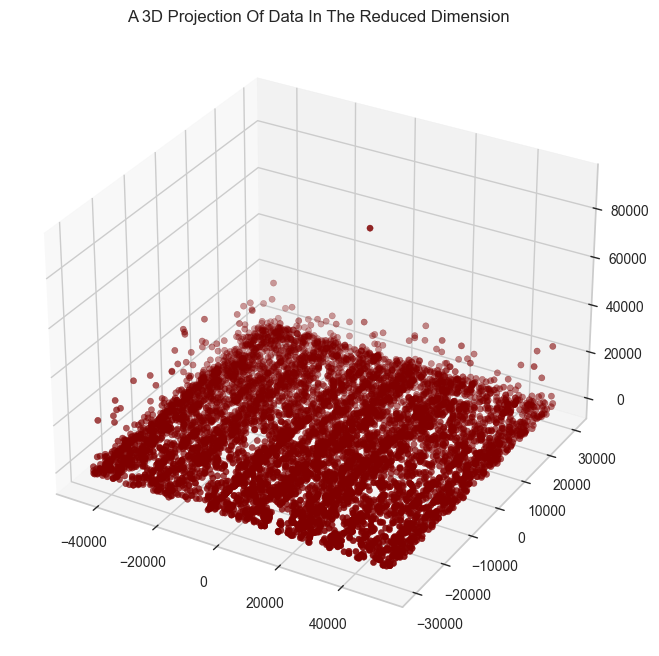

In [252]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# #05 - Clusterização

## Agrupamento

Agora que reduzi os atributos para três dimensões, vou realizar o agrupamento por meio do método de agrupamento aglomerativo. O agrupamento aglomerativo é um método de agrupamento hierárquico. Envolve a fusão de exemplos até que o número desejado de clusters seja alcançado.

## Passos envolvidos no Agrupamento

1. Método do Cotovelo para determinar o número de clusters a serem formados
2. Agrupamento via Agrupamento Aglomerativo
3. Examinando os clusters formados por meio de um gráfico de dispersão


In [253]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

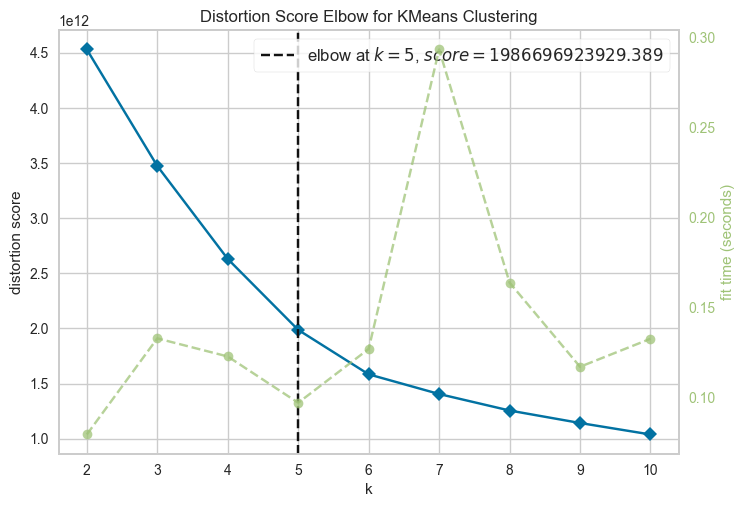

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [254]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_limpo)
Elbow_M.show()

### Agglomerative Clusterização

In [255]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_limpo)
PCA_ds["AggClusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_limpo["AggClusters"]= yhat_AC



C:\Users\Jackson\AppData\Local\Temp\ipykernel_36676\1818379344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo["AggClusters"]= yhat_AC


### Calculando Silhoutte Score

In [256]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_limpo, yhat_AC)

In [257]:
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3158079073940695


### Plotando os clusters nas 3 Dimensões

C:\Users\Jackson\AppData\Local\Temp\ipykernel_36676\1943357091.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(set(PCA_ds["AggClusters"])))


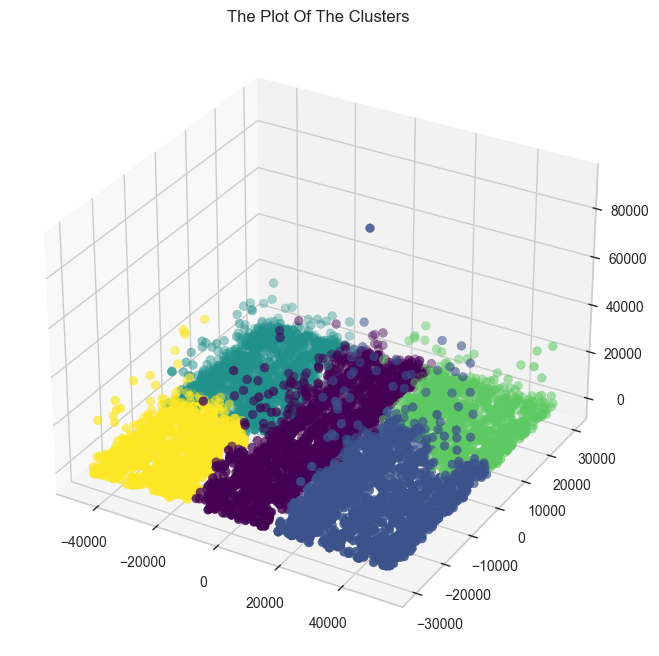

In [259]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Certifique-se de importar o módulo cmap
import matplotlib.cm as cm

# Se 'PCA_ds["AggClusters"]' for um array de números inteiros representando os rótulos de cluster
cmap = cm.get_cmap('viridis', len(set(PCA_ds["AggClusters"])))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["AggClusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()


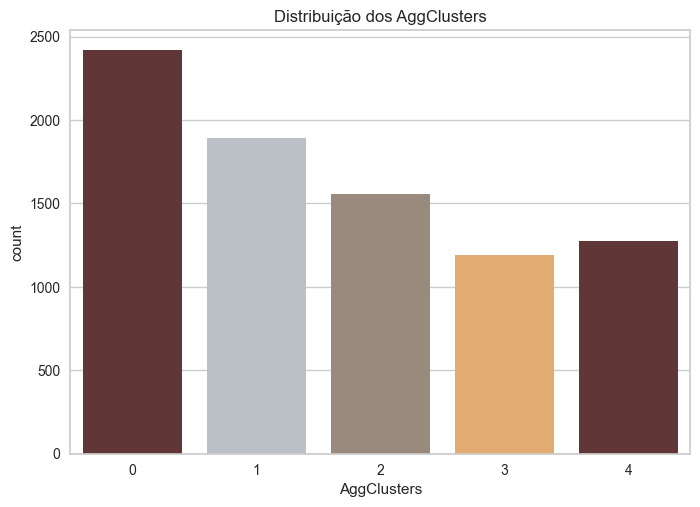

In [260]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_limpo["AggClusters"], palette= pal)
pl.set_title("Distribuição dos AggClusters")
plt.show()

# K- Means

In [261]:
from sklearn.cluster import *
kmeans = KMeans(n_clusters=5)
yhat_kmeans = kmeans.fit_predict(PCA_ds)
PCA_ds["KmeanClusters"] = yhat_kmeans
df_limpo["KmeanClusters"]= yhat_kmeans


c:\Users\Jackson\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jackson\AppData\Local\Temp\ipykernel_36676\1141895703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo["KmeanClusters"]= yhat_kmeans


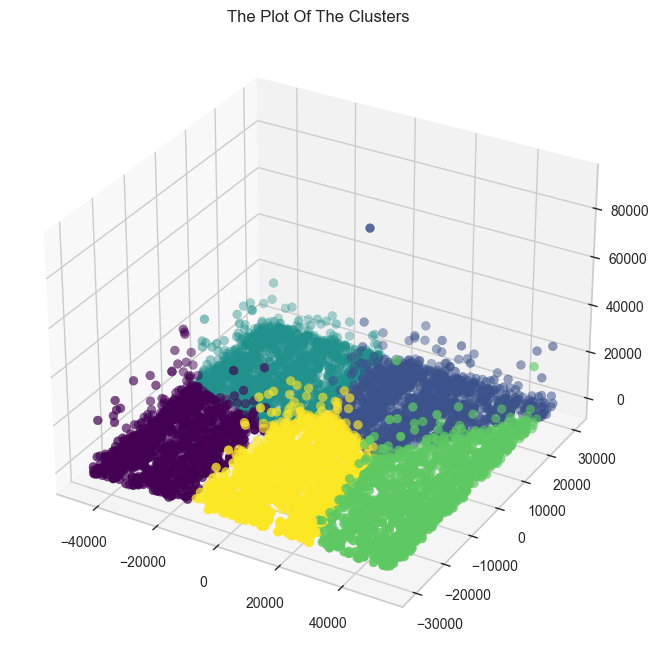

In [262]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["KmeanClusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

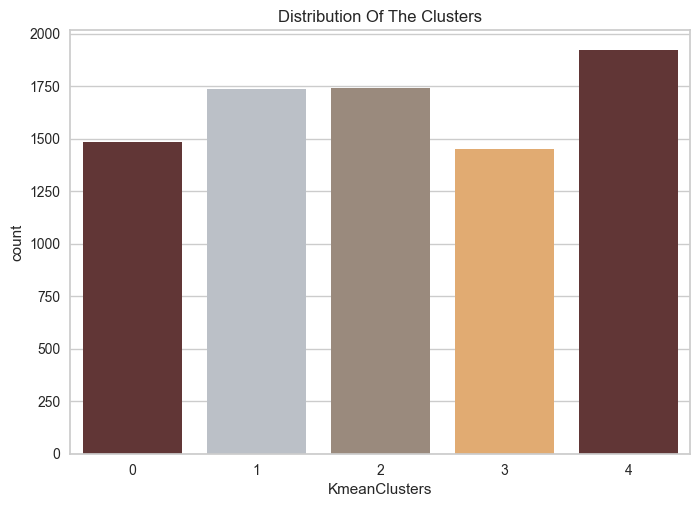

In [264]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_limpo["KmeanClusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# DBSCAN

In [265]:
from sklearn.cluster import *
dbscan = DBSCAN(eps=1)
yhat_dbscan = dbscan.fit_predict(PCA_ds)
PCA_ds["DBSCANClusters"] = yhat_dbscan
df_limpo["DBSCANClusters"]= yhat_dbscan

C:\Users\Jackson\AppData\Local\Temp\ipykernel_36676\3400099287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo["DBSCANClusters"]= yhat_dbscan


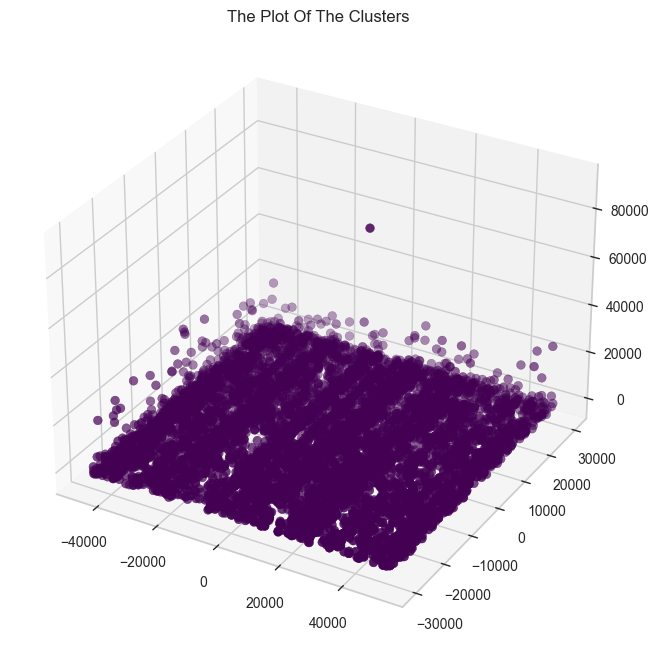

In [266]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["DBSCANClusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

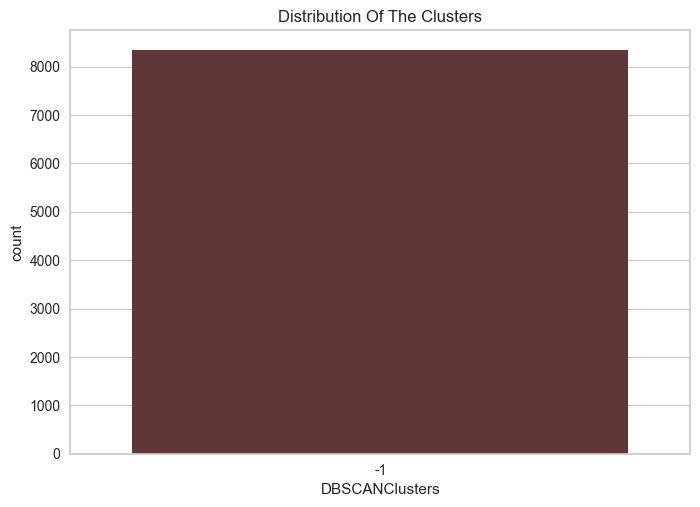

In [268]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_limpo["DBSCANClusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()